### Iris dataset (150 iris flowers from 3 different specifes/classes)
- classes (3): setosa (n=50), veriscolor (n=50), virginica (n=50)
- features (4): sepal length, sepal width, petal length, petal width

other examples: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header=None, sep=',')
df.columns = ['sepal_len','sepal_wid','petal_len','petal_wid','class']
df.dropna(how="all",inplace=True) #drops the empty line at file-end
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### split data table into data X and class labels Y

In [ ]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

#### our iris dataset is now stored in form of a 150x4 matrix. Each sample row, x, can be pictured as a 4-d vector.
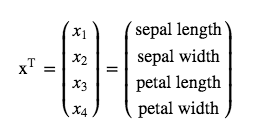

In [44]:
#standardize
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [29]:
#singular vector decomposition (SVD) -- improves computational effeciency
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

Components:
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]
Explained Variance:
 [ 2.91081808  0.92122093  0.14735328  0.02060771]


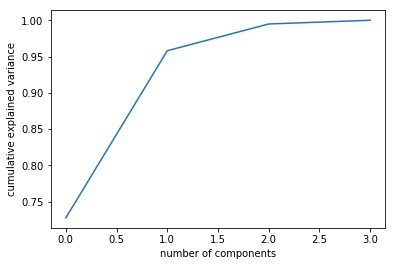

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
Y = pca.fit_transform(X_std)
print("Components:\n", pca.components_)
print("Explained Variance:\n",pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

- PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule.